In [22]:

# Define a json structure to pass in that the calibration will run off of:

import json

input_json = {'ImageFiles': 
                {'VNIR': 
                    {'image_to_calibrate': 'Frame 0240_50fpsuncropped.tif',
                    'white_ref' : 'calibration_data/spectralon 0.15ms.tif',
                    'dark_ref' : 'calibration_data/dark 0.15ms.tif',
                    '5_ref': 'calibration_data/ref_5.png',
                    '20_ref': 'calibration_data/ref_20.png',
                    '80_ref': 'calibration_data/ref_80.png',
                    '99_ref': 'calibration_data/ref_99.png'},
                 'SWIR': 
                    {'image_to_calibrate': 'Frame 0240_50fpsuncropped.tif',
                    'white_ref' : 'calibration_data/spectralon 0.15ms.tif',
                    'dark_ref' : 'calibration_data/dark 0.15ms.tif',
                    '5_ref': 'calibration_data/ref_5.png',
                    '20_ref': 'calibration_data/ref_20.png',
                    '80_ref': 'calibration_data/ref_80.png',
                    '99_ref': 'calibration_data/ref_99.png'}},
              'ImageSettings' :
              {'x_start' : 0,
               'y_start' : 0, 
               'x_end' : 'end',
               'y_end' : 'end'
              },
            'HyperSpectralMetaData': 
              {'VNIR':
                 {'HSType' : 'VNIR',
                 'HSBandMin' : 850,
                  'HSBandMax' : 1650,
                  'HSBandWidth' : 2.74509804,
                  'HSNumBands' : 256,
                  'ImageDimX' : 320,
                  'TrueReflectanceValues' : [5, 20, 80, 99, 100]},
               'SWIR':
                 {'HSType' : 'SWIR',
                 'HSBandMin' : 1550,
                  'HSBandMax' : 2350,
                  'HSBandWidth' : 2.74509804,
                  'HSNumBands' : 256,
                  'ImageDimX' : 320,
                  'TrueReflectanceValues' : [5, 20, 80, 99, 100]}},
              'AnalysisSettings':
              {'CalibrationMethod': 'TwoPoint' # Options should include TwoPoint, LinearRegression, QuadraticRegression
              },
            'GeneralMetadata':
                 {'Project' : 'Somewhere',
                     'HolePos' : 300,
                 'DateScanned' : '04_09_2023'}        
}

# Serializing json
json_object = json.dumps(input_json,
                         indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [92]:
# Read the json input file

with open('sample.json', 'r') as f:
    input_json = json.load(f)
input_json

{'ImageFiles': {'image_to_calibrate': 'Frame 0240_50fpsuncropped.tif',
  'white_ref': 'calibration_data/spectralon 0.15ms.tif',
  'dark_ref': 'calibration_data/spectralon 0.15ms.tif',
  '5_ref': 'calibration_data/ref_5.png',
  '20_ref': 'calibration_data/ref_20.png',
  '80_ref': 'calibration_data/ref_80.png',
  '99_ref': 'calibration_data/ref_99.png'},
 'ImageSettings': {'x_start': 0, 'y_start': 0, 'x_end': 'end', 'y_end': 'end'},
 'HyperSpectralMetaData': {'HSType': 'VNIR',
  'HSBandMin': 300,
  'HSBandMax': 1000,
  'HSBandWidth': 2.74509804,
  'HSNumBands': 256,
  'ImageDimX': 320},
 'GeneralMetadata': {'HolePos': 300, 'DateScanned': '04/09/2023'}}

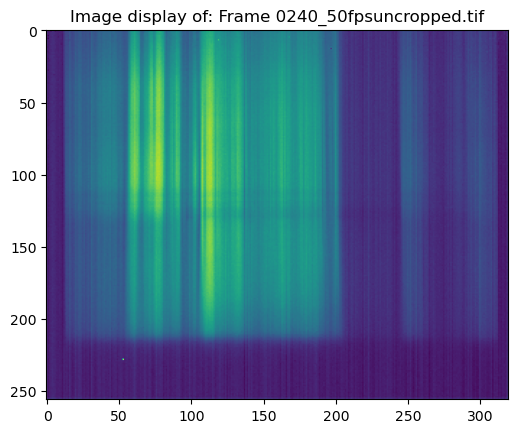

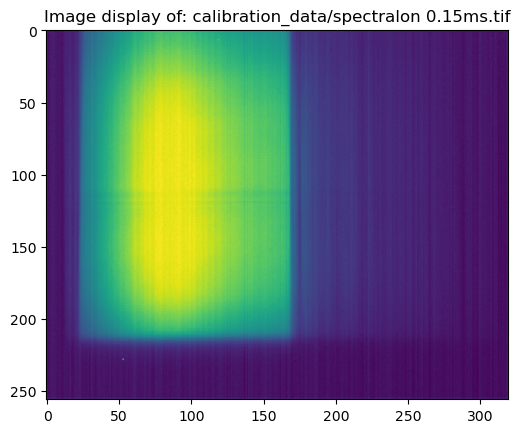

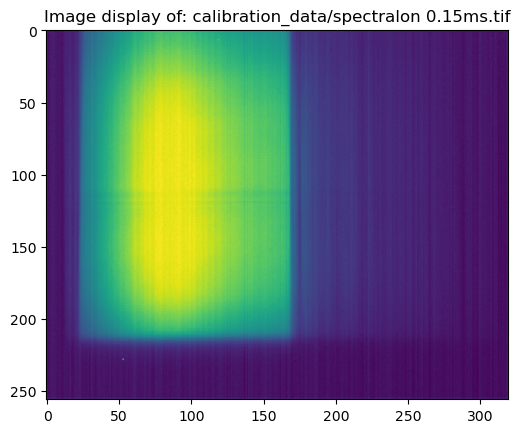

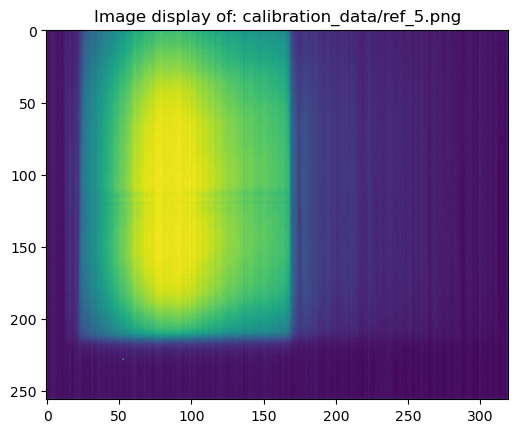

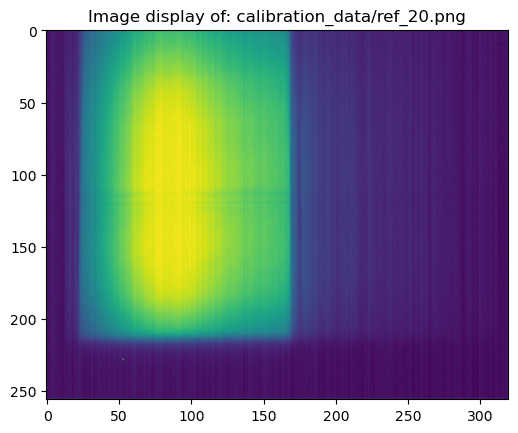

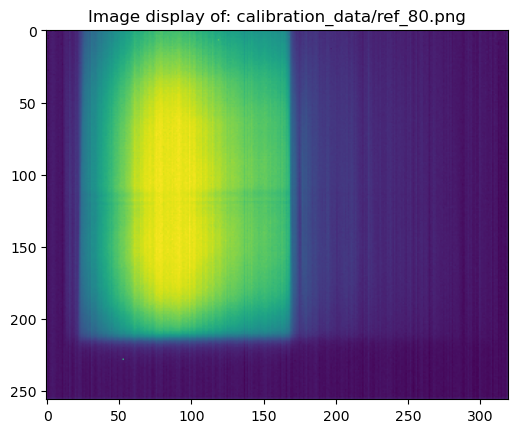

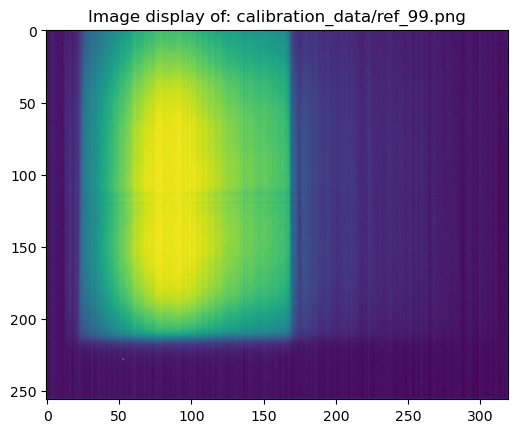

In [101]:
import os
from PIL import Image
from matplotlib import pyplot as plt

images = {}
for key, value in input_json['ImageFiles'].items():
    try:
        image = fetch_image_data(value)
        images[key] = image
    except FileNotFoundError as e:
        print(f'Error loading image {key}: {str(e)}')
    except ValueError as e:
        print(f'Error loading image {key}: {str(e)}')

dict_keys(['image_to_calibrate', 'white_ref', 'dark_ref', '5_ref', '20_ref', '80_ref', '99_ref'])

In [97]:
def fetch_image_data(
                     image_path: str,
                     show_image: bool = True) -> np.ndarray:
    """
    Reads an image file from the given path using Pillow, and returns it
    as a NumPy array.
    Optionally, displays the image using Matplotlib.

    Args:
        image_path (str): Path to the image file.
        show_image (bool): Whether to display the image using Matplotlib.
        Default is True.

    Returns:
        np.ndarray: A NumPy array representing the image.

    Raises:
        FileNotFoundError: If the specified image file does not exist.
        ValueError: If the specified image file is not a valid image file
        or could not be read.

    """

    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"{image_path} not found")
    try:
        with Image.open(image_path) as image:
            example_image = plt.imread(image_path)
            if show_image:
                plt.figure()
                plt.imshow(example_image)
                plt.title('Image display of: ' + image_path)
            return example_image
    except Exception as e:
        raise ValueError(f"Could not read {image_path}: {str(e)}")